In [3]:
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

xgb_preds = np.load('../../results/xgb_preds_1.npy')
svr_preds = np.load('../../results/svr_preds_1.npy')
y_test = np.load("../../results/y_test.npy")


In [4]:
# Ensure they are the same length
min_len = min(len(xgb_preds), len(svr_preds))
p_xgb = np.array(xgb_preds[-min_len:])
p_svr = np.array(svr_preds[-min_len:])
y_true = y_test[-min_len:]


In [5]:
# 2. FIND OPTIMAL BLEND WEIGHT
# We test weights from 0.0 to 1.0 to find the perfect mix
best_mae = 999
best_weight = 0

print("Finding optimal blend...")
for w in np.arange(0, 1.01, 0.05):
    # Blend formula
    p_blend = (w * p_xgb) + ((1 - w) * p_svr)
    
    mae = mean_absolute_error(y_true, p_blend)
    
    if mae < best_mae:
        best_mae = mae
        best_weight = w
        print(f"New Best: Weight {w:.2f} XGB | MAE: {mae:.5f}")

print("\n" + "="*30)
print(f"FINAL ENSEMBLE RESULT")
print(f"Optimal Mix: {best_weight:.2f} XGB + {1-best_weight:.2f} SVR")
print(f"Ensemble MAE: {best_mae:.5f}")
print("="*30)


Finding optimal blend...
New Best: Weight 0.00 XGB | MAE: 0.66597
New Best: Weight 0.05 XGB | MAE: 0.66154
New Best: Weight 0.10 XGB | MAE: 0.65746
New Best: Weight 0.15 XGB | MAE: 0.65412
New Best: Weight 0.20 XGB | MAE: 0.65106
New Best: Weight 0.25 XGB | MAE: 0.64836
New Best: Weight 0.30 XGB | MAE: 0.64579
New Best: Weight 0.35 XGB | MAE: 0.64361
New Best: Weight 0.40 XGB | MAE: 0.64205
New Best: Weight 0.45 XGB | MAE: 0.64077
New Best: Weight 0.50 XGB | MAE: 0.63972
New Best: Weight 0.55 XGB | MAE: 0.63907
New Best: Weight 0.60 XGB | MAE: 0.63893
New Best: Weight 0.65 XGB | MAE: 0.63885

FINAL ENSEMBLE RESULT
Optimal Mix: 0.65 XGB + 0.35 SVR
Ensemble MAE: 0.63885


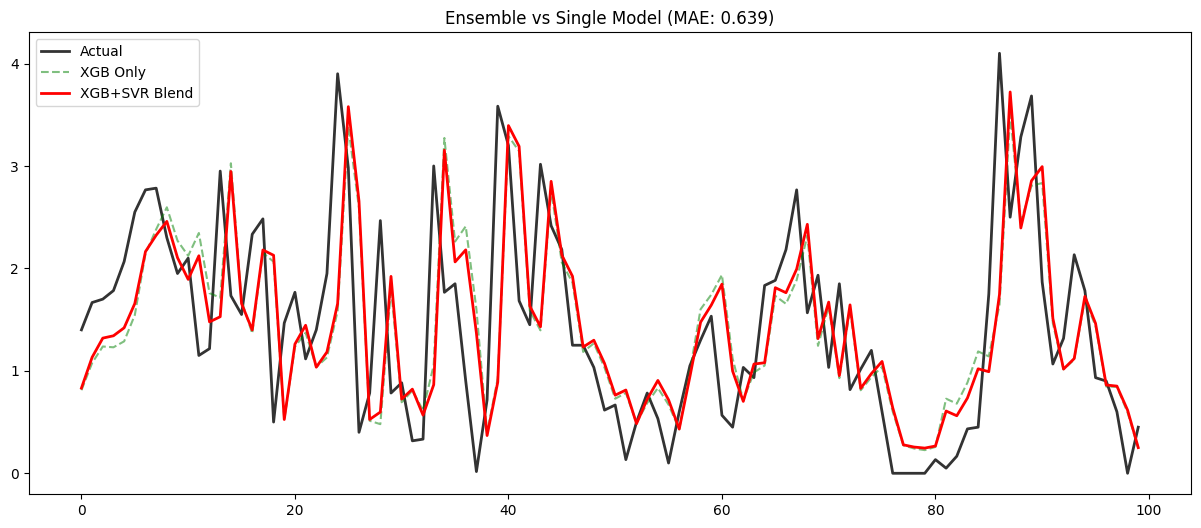

In [6]:

# 3. PLOT THE DIFFERENCE
# See how the blend smooths out the jittery tree predictions
best_blend = (best_weight * p_xgb) + ((1 - best_weight) * p_svr)

plt.figure(figsize=(15, 6))
limit = 100
plt.plot(y_true[-limit:], label='Actual', color='black', linewidth=2, alpha=0.8)
plt.plot(p_xgb[-limit:], label='XGB Only', color='green', linestyle='--', alpha=0.5)
plt.plot(best_blend[-limit:], label='XGB+SVR Blend', color='red', linewidth=2)
plt.title(f"Ensemble vs Single Model (MAE: {best_mae:.3f})")
plt.legend()
plt.show()